In [10]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Řešení 1d úlohy s reaktivním členem pomocí metody konečných diferencí <br> (metoda sítí, finite differences method) 
### Neumannova okrajová podmínka

Úkolem je vyřešit následující rovnici s reaktivním členem pomocí metody konečných diferencí. Tuto úlohu umíme řešit i analyticky. Získané numerické řešení tedy porovnejte s analytickým a ověřte, zda je numerická aproximace přesnější, když použijete jemnější mřížku (vyšší hodnotu parametru **n**).

In [6]:
%% boundary value problem:
%   -k*u''(x)+k0*u(x)=g
%   u(0)=U
%   -k*u'(L)=T

Nastavení všech parametrů výše specifikované úlohy. <br> Začněte nejprve s těmito parametry a až úkol dokončíte, zkuste provádět jejich změny a zkoumat vliv na řešení úlohy.

In [7]:
k=1;
k0=1; 
L=10;
f=0; Uhat=1; g=f+k0*Uhat;
U=0;
T=-1;

Řešte úlohu nejprve pomocí metody konečných diferencí, tj. doplňte chybějící příkazy (využijte nápovědu v komentářích):

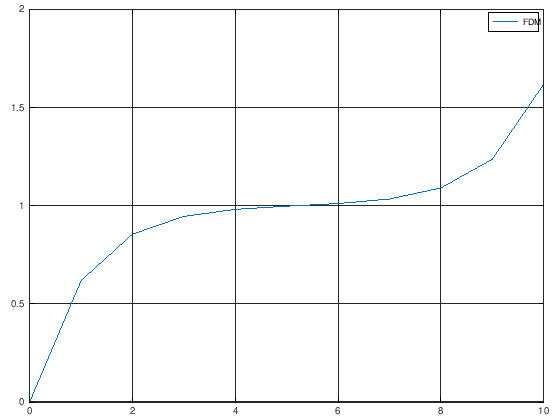

In [8]:
%% solution using finite diferences
n=10;           % number of steps (discretization intervals)
h=L/n;          % length of one step
A=diag(ones(n-1,1),-1)-(2+k0*h^2/k)*diag(ones(n,1))+diag(ones(n-1,1),1); % matrix assembly
b=-ones(n,1)*h^2*g/k; % right hand side
b(1)=b(1)-U;    % Dirichlet boundary condition
A(end,end)=A(end,end)+1; b(end)=b(end)+T/k*h; % Neumann b. c.
u_FDM=A\b;          % solution of the linear system
u_FDM=[U; u_FDM];       % adding the left point (with Dirichlet b. c.)
x_FDM=linspace(0,L,n+1); % points of visualization given by the discretization

figure(1)
plot(x_FDM,u_FDM) % plot of the numerical solution
legend('FDM');
grid on

Pro srovnání vyřešte úlohu také analyticky. Analytické řešení vykreslete a porovnejte s numerickým:

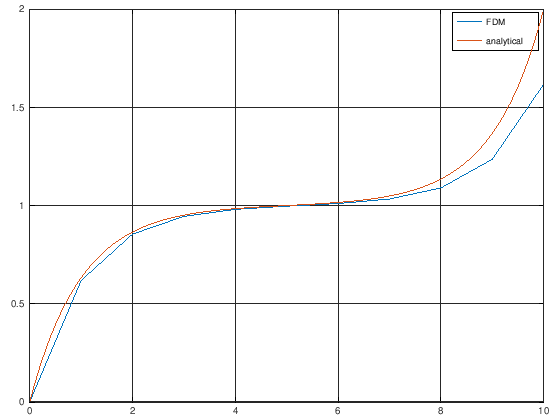

In [9]:
%% analytical solution
K=sqrt(k0/k);
C1=(T/k+(U-g/k0)*K*exp(K*L))/K/(exp(-K*L)+exp(K*L));
C2=U-C1-g/k0;
u_analytical=@(x)C1*exp(-K*x)+C2*exp(K*x)+g/k0;
x_analytical=linspace(0,L,100);    % points of visualization

figure(2);
plot(x_FDM,u_FDM) % plot of the numerical solution
hold on
plot(x_analytical,u_analytical(x_analytical)) % plot of the analytical solution
legend('FDM','analytical');
grid on